<a href="https://colab.research.google.com/github/oumaimadgn/ClusteringWithKmeans/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is designed to practice the application of the K-means clustering algorithm.

Members:
* *BARAKATE Imane.*
* *DAGOUN Oumaima.*
* *SLIOUI Badr Eddine.*

The dataset used consists of customer data with attributes such as CustomerID, Gender, Age, Annual Income (in thousands of dollars), and Spending Score (ranging from 1 to 100).

**Loading the Data**

In [ ]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Preprocessing the Data**


In [ ]:
print(data.isnull().sum())

features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Visualizing the Data**

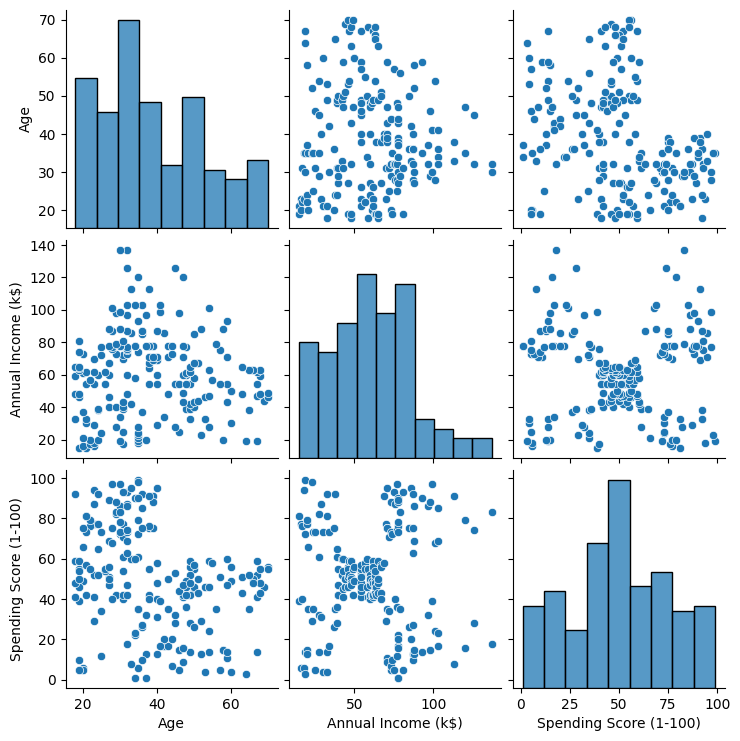

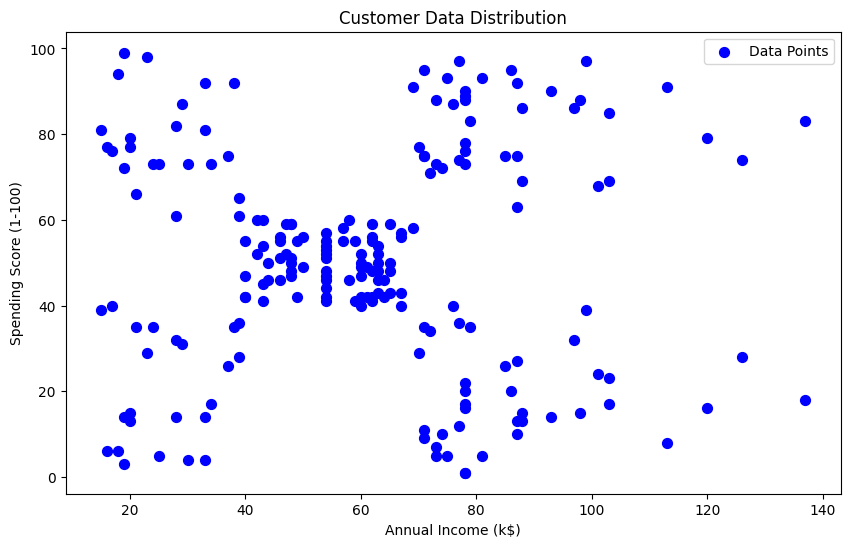

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(features)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], s=50, c='blue', label='Data Points')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Customer Data Distribution')
plt.show()


**Determing Optimal Clusters (Elbow Method)**

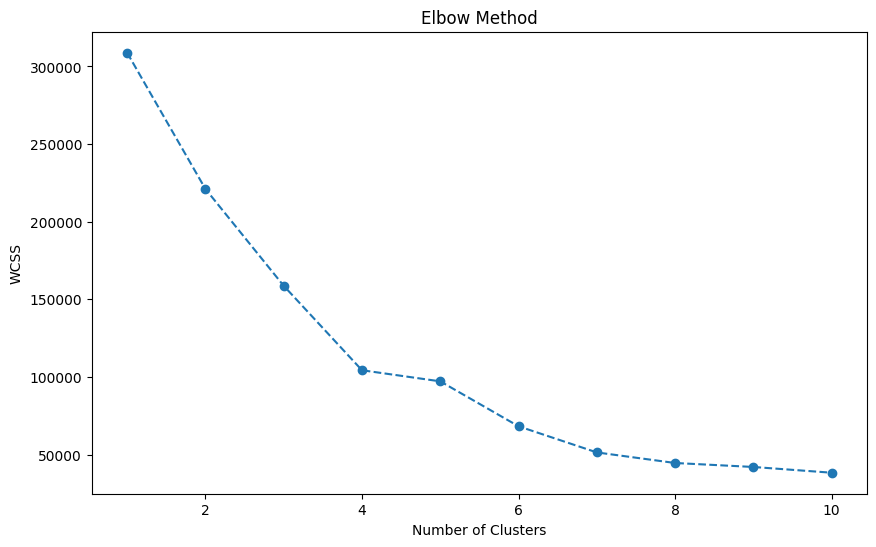

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Applying KMeans Clustering for k=4**

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

data['Cluster'] = clusters
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        0  
3        2  
4        0  


**Visualizing Clusters**

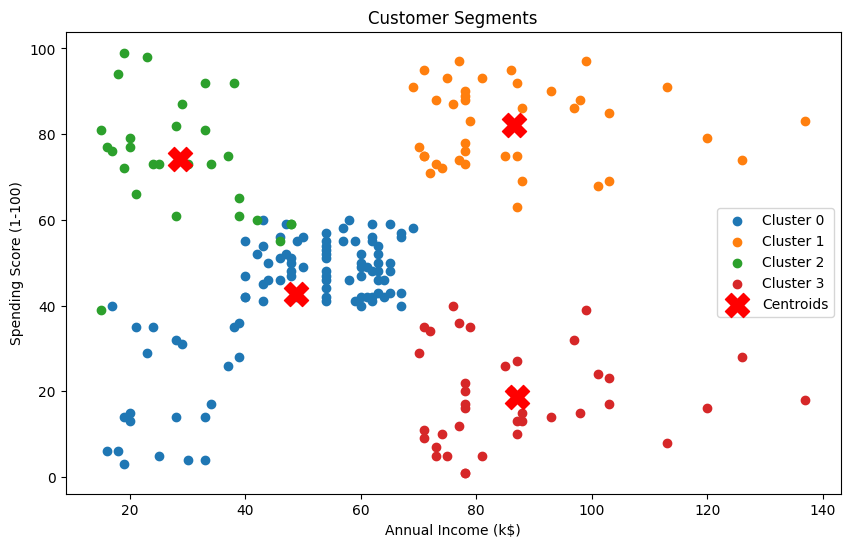

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(
        features.loc[data['Cluster'] == i, 'Annual Income (k$)'],
        features.loc[data['Cluster'] == i, 'Spending Score (1-100)'],
        label=f'Cluster {i}'
    )

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('Customer Segments')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(data,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    title="Customer Segmentation")
fig.show()


**Evaluating the clustering results**

Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(features, clusters)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.41


Calinski-Harabasz Index


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(features, clusters)
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Calinski-Harabasz Score: 127.98


Davies-Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(features, clusters)
print(f"Davies-Bouldin Score: {db_score:.2f}")

Davies-Bouldin Score: 0.89


**Summary:**

The clustering has moderate quality based on these scores:
* Moderate cohesion and separation (Silhouette Score = 0.41).
* Good separation between clusters (Calinski-Harabasz Score = 127.98).
* Some overlap or similarity between clusters (Davies-Bouldin Score = 0.89).